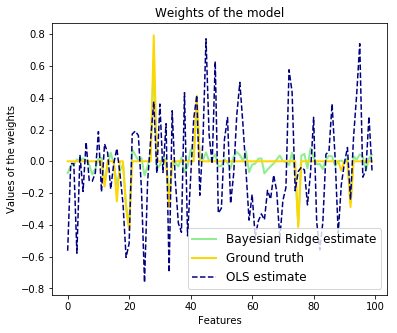

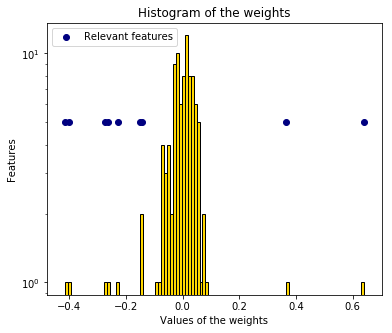

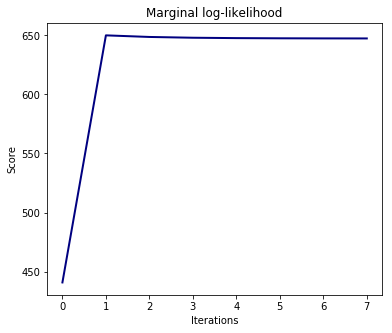

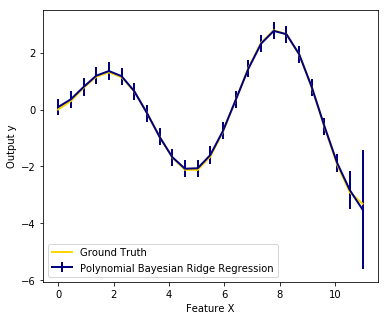

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data

# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
sample_submission = pd.read_csv("./data/sample_submit.csv", header=None)

KeyboardInterrupt: 

In [ ]:
train_X, train_y = train_data.iloc[:, :-1], train_data.iloc[:, -1]
test_X = test_data

In [5]:
mask = (train_X["period"] == "train9") | (train_X["period"] == "train6") | (train_X["period"] == "train4") | (train_X["period"] == "train7") | \
(train_X["period"] == "train5") | (train_X["period"] == "train3") | (train_X["period"] == "train1") | (train_X["period"] == "train14") | \
(train_X["period"] == "train13") | (train_X["period"] == "train11") | (train_X["period"] == "train10") | (train_X["period"] == "train2") | \
(train_X["period"] == "train12")
train_X = train_X[mask]
train_y = train_y[mask]

In [6]:
len(train_data)

560000

In [7]:
len(train_X)

520000

In [8]:
feature_select = ["c12", "c80", "c48", "c76"] #
feature_select = ["c12", "c80", "c48", "c76", "c81"] #0.69260
#feature_select = ["c12", "c80", "c48", "c76", "c81", "c68", "c58", "c56", "c27", "c67"]　# 0.69472
train_X_select = train_X[feature_select]
train_X_select["bias"] = 1

w = np.linalg.inv(train_X_select.T.dot(train_X_select)).dot(train_X_select.T).dot(train_y)
test_X_select = test_X[feature_select]
test_X_select["bias"] = 1

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


validで評価

In [18]:
print classification_report(valid_y, pred_y)
print log_loss(y_pred=pred_y, y_true=valid_y) 
print confusion_matrix(valid_y, pred_y)

             precision    recall  f1-score   support

          0       0.59      0.50      0.54     28046
          1       0.56      0.65      0.60     27954

avg / total       0.57      0.57      0.57     56000

14.7507265458
[[13901 14145]
 [ 9771 18183]]


提出用

In [9]:
sample_submission[1] = w.dot(test_X_select.T)
sample_submission.to_csv("result.csv", index=0)

In [8]:
test_y = RF.predict_proba(test_X.iloc[:, 1:])
sample_submission[1] = test_y[:, 1]
sample_submission.to_csv("result.csv", index=0)